In [1]:
# Importações
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from IPython.display import display, clear_output
from concurrent.futures import ThreadPoolExecutor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from matplotlib.animation import FuncAnimation
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from IPython.display import display_html
from sklearn.tree import export_graphviz
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from itertools import combinations
from sklearn import linear_model
from graphviz import Digraph
from sklearn import tree
from scipy import stats
from PyPDF2 import PdfMerger
from joblib import dump, load


import matplotlib.backends.backend_pdf as pltpdf
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import dask.dataframe as dd
import graphviz as gv
import seaborn as sns
import pandas as pd
import numpy as np
import datetime
import graphviz
import warnings
import os
import re
import time

warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")
os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz\bin'

In [2]:
# Leitura do arquivo CSV em partes (chunks) para otimização de uso de memória
csv_file_path = "DrDoS_UDP.csv"
# Tamanho do chunk (ajuste conforme necessário)
chunk_size = 100000
# Lista para armazenar os chunks
chunks = []
# Iterar sobre o arquivo CSV em chunks e armazenar em uma lista
for chunk in pd.read_csv(csv_file_path, chunksize=chunk_size, low_memory=False):
    chunks.append(chunk)

In [3]:
# Carregue seus dados (substitua 'seus_dados.csv' pelo nome do seu arquivo)
dados = pd.concat(chunks, ignore_index=True)

In [4]:
amostra = dados

In [5]:
dados.columns = dados.columns.str.strip()
display(dados.describe())
print(dados.columns)

,Unnamed: 0,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound
count,3.136802e+06,3.136802e+06,3.136802e+06,3.136802e+06,3.136802e+06,3.136802e+06,3.136802e+06,3.136802e+06,3.136802e+06,3.136802e+06,...,3.136802e+06,3.136802e+06,3.136802e+06,3.136802e+06,3.136802e+06,3.136802e+06,3.136802e+06,3.136802e+06,3.136802e+06,3.136802e+06
mean,6.284729e+04,4.678466e+04,3.326777e+04,1.699073e+01,9.454659e+04,3.769507e+00,5.931838e-03,1.370530e+03,1.257003e+00,3.885615e+02,...,-3.979974e+07,1.441213e+02,5.098763e+01,1.891834e+02,1.061237e+02,2.348633e+03,1.030996e+02,2.454045e+03,2.266851e+03,9.988192e-01
std,3.640744e+04,8.463285e+03,1.865171e+04,3.255629e-01,6.825386e+05,3.745687e+00,6.018696e-01,1.120631e+03,2.431255e+02,4.950828e+01,...,2.017720e+08,5.206479e+04,3.149175e+04,6.879844e+04,4.339355e+04,3.168890e+05,3.667490e+04,3.264913e+05,3.117682e+05,3.434278e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-1.062719e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.136800e+04,3.980600e+04,1.715900e+04,1.700000e+01,1.000000e+00,2.000000e+00,0.000000e+00,7.660000e+02,0.000000e+00,3.750000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,6.273600e+04,4.689400e+04,3.329400e+04,1.700000e+01,1.320000e+02,4.000000e+00,0.000000e+00,1.398000e+03,0.000000e+00,3.890000e+02,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,9.410400e+04,5.389600e+04,4.942600e+04,1.700000e+01,1.088440e+05,4.000000e+00,0.000000e+00,1.438000e+03,0.000000e+00,3.930000e+02,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,1.325940e+05,6.553100e+04,6.553500e+04,1.700000e+01,1.200000e+08,2.232000e+03,3.610000e+02,5.907600e+04,2.057900e+05,3.547000e+03,...,1.472000e+03,6.151289e+07,4.868047e+07,7.286843e+07,6.151289e+07,1.166865e+08,3.551041e+07,1.166865e+08,1.166865e+08,1.000000e+00


Index(['Unnamed: 0', 'Flow ID', 'Source IP', 'Source Port', 'Destination IP',
       'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration',
       'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Le

In [6]:
dados_tr = amostra
dados_tr.reset_index(drop=True, inplace=True)

In [7]:
#amostra2 = dados[dados['Label'].str.contains('BENIGN')]
## Concatenar amostra e amostra2
#dados_tr = pd.concat([amostra, amostra2])

# Redefinir o índice do DataFrame concatenado
#dados_tr.reset_index(drop=True, inplace=True)

In [8]:
# Lista das colunas a serem selecionadas
#colunas_selecionadas = ['Fwd Packet Length Std', 'Packet Length Std', 'Fwd IAT Mean', 'min_seg_size_forward',
#                        'Fwd IAT Max', 'Destination Port', 'Fwd Packet Length Max', 'Fwd Packet Length Mean',
#                        'Fwd Packet Length Min', 'Protocol', 'Timestamp', 'Label']

# Lista das colunas a serem selecionadas
colunas_selecionadas = ['Fwd Packet Length Mean', 'Fwd IAT Mean', 'min_seg_size_forward', 'Destination Port', 'Protocol', 'Timestamp', 'Label']

# Remova espaços em branco dos nomes das colunas
dados_tr.columns = dados_tr.columns.str.strip()

# Encontrando o primeiro e o último horário
primeiro_horario = dados_tr['Timestamp'].min()
ultimo_horario = dados_tr['Timestamp'].max()

print(f"Primeiro horario do ataque: {primeiro_horario}")
print(f"Ultimo horario do ataque: {ultimo_horario}")


# Verifique se todas as colunas selecionadas estão no DataFrame
if set(colunas_selecionadas).issubset(dados_tr.columns):
    # Selecionar apenas as colunas desejadas
    df_dados = dados_tr[colunas_selecionadas]
    # Remover colunas duplicadas
    df_dados = df_dados.loc[:,~df_dados.columns.duplicated()]
    df_dados = df_dados.dropna()

    # Mostrar todas as colunas disponíveis no novo DataFrame
    print("Colunas Selecionadas:")
    print(df_dados.columns)
    print("\n")
    display(df_dados)
else:
    print(dados_tr.columns)
    print(dados_tr)
    print("Nomes das colunas selecionadas não correspondem às colunas no DataFrame.")

Primeiro horario do ataque: 2018-12-01 12:36:57.628026
Ultimo horario do ataque: 2018-12-01 13:04:45.928382
Colunas Selecionadas:
Index(['Fwd Packet Length Mean', 'Fwd IAT Mean', 'min_seg_size_forward',
       'Destination Port', 'Protocol', 'Timestamp', 'Label'],
      dtype='object')




,Fwd Packet Length Mean,Fwd IAT Mean,min_seg_size_forward,Destination Port,Protocol,Timestamp,Label
0,348.0,43679.000000,-1,6652,17,2018-12-01 12:36:57.628026,DrDoS_UDP
1,349.5,36073.000000,-1,9712,17,2018-12-01 12:36:57.628076,DrDoS_UDP
2,359.5,34859.666667,-1,4680,17,2018-12-01 12:36:57.628164,DrDoS_UDP
3,386.0,36989.000000,-1,2644,17,2018-12-01 12:36:57.628166,DrDoS_UDP
4,383.0,1.000000,-1,16901,17,2018-12-01 12:36:57.628217,DrDoS_UDP
...,...,...,...,...,...,...,...
3136797,401.0,2.000000,20,6479,17,2018-12-01 13:04:45.928050,DrDoS_UDP
3136798,401.0,1.000000,20,33462,17,2018-12-01 13:04:45.928055,DrDoS_UDP
3136799,321.0,2.000000,20,22593,17,2018-12-01 13:04:45.928173,DrDoS_UDP
3136800,375.0,2.000000,20,46618,17,2018-12-01 13:04:45.928225,DrDoS_UDP


# Classifier comparison

In [9]:
# Converta a coluna 'Timestamp' para objetos datetime
df_dados['Timestamp'] = pd.to_datetime(df_dados['Timestamp'])

# Calcule o número de segundos desde a época Unix
df_dados['Timestamp_seconds'] = (df_dados['Timestamp'] - pd.Timestamp("1970-01-01")) // pd.Timedelta(seconds=1)

# Preparar os dados
X = df_dados.drop(['Label', 'Timestamp', 'Timestamp_seconds'], axis=1)  # Remova também a coluna 'Timestamp_seconds'
y = df_dados['Label']


# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Verifique se a coluna 'Timestamp_seconds' não está em X_test
assert 'Timestamp_seconds' not in X_train.columns
assert 'Timestamp_seconds' not in X_test.columns

In [10]:
# Encontrando o primeiro e o último horário
primeiro_horario = df_dados['Timestamp'].min()
ultimo_horario = df_dados['Timestamp'].max()

print(f"Primeiro horario do ataque: {primeiro_horario}")
print(f"Ultimo horario do ataque: {ultimo_horario}")

Primeiro horario do ataque: 2018-12-01 12:36:57.628026
Ultimo horario do ataque: 2018-12-01 13:04:45.928382


In [11]:
# Classificador logístico
lr = LogisticRegression()

# Árvore de decisão
dt = DecisionTreeClassifier(max_depth=5)

# Cria a floresta aleatória
rf = RandomForestClassifier(max_depth=5)

In [12]:
# Treinar o classificador logístico
lr.fit(X_train, y_train)

# Treinar a árvore de decisão
dt.fit(X_train, y_train)

# Treinar a floresta aleatória
rf.fit(X_train, y_train)

C:\Users\Leo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier(max_depth=5)

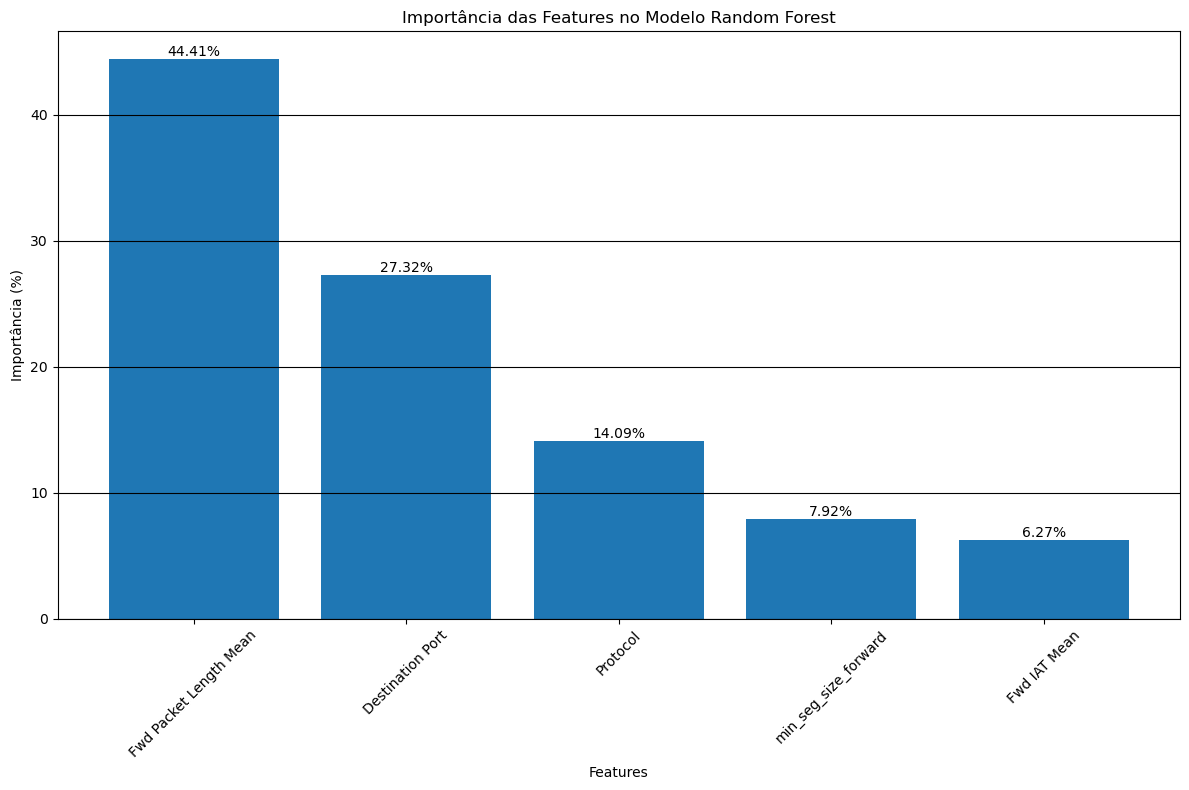

In [13]:
# Obtenha a importância das features do modelo treinado
importancias_features = rf.feature_importances_

# Converta as importâncias para porcentagens
importancias_features_percent = importancias_features * 100

# Obtenha o nome das features
nomes_features = X.columns

# Ordenar as importâncias das features e os nomes das features em ordem decrescente
indices = importancias_features.argsort()[::-1]
importancias_features_ordenadas = importancias_features_percent[indices]
nomes_features_ordenados = nomes_features[indices]

# Crie o gráfico de barras
plt.figure(figsize=(12, 8))
bars = plt.bar(range(X.shape[1]), importancias_features_ordenadas, align='center')
plt.xticks(range(X.shape[1]), nomes_features_ordenados, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importância (%)')
plt.title('Importância das Features no Modelo Random Forest')

# Adicionar rótulos de valor nas barras
for bar, importance in zip(bars, importancias_features_ordenadas):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{importance:.2f}%', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.grid(axis='y', color='black')
plt.tight_layout()
plt.savefig('img/importancia_features.png', dpi=300, bbox_inches='tight')
plt.show()

In [14]:
# Salvando o modelo
dump(rf, 'random_forest_model.joblib')

['random_forest_model.joblib']

In [15]:
# Capturar o tempo de início de predição do Classificador Logístico
tempo_inicio = time.time()

# Fazer previsões com o classificador logístico
y_pred_lr = lr.predict(X_test)

# Capturar o tempo de término de predição do Classificador Logístico
tempo_fim = time.time()

# Calcular o tempo de predição em segundos
prediction_time = tempo_fim - tempo_inicio

print("Tempo de predição do Classificador Logístico:", prediction_time, "segundos")

Tempo de predição do Classificador Logístico: 0.02100396156311035 segundos


In [16]:
# Capturar o tempo de início de predição da Árvore de decisão
tempo_inicio1 = time.time()

# Fazer previsões com a árvore de decisão
y_pred_dt = dt.predict(X_test)

# Capturar o tempo de término de predição da Árvore de Decisão
tempo_fim1 = time.time()

# Calcular o tempo de predição em segundos
prediction_time1 = tempo_fim1 - tempo_inicio1

print("Tempo de predição da Árvore de decisão:", prediction_time1, "segundos")

Tempo de predição da Árvore de decisão: 0.037000179290771484 segundos


In [17]:
# Capturar o tempo de início de predição da Floresta Aleatória
tempo_inicio2 = time.time()

# Fazer previsões com a floresta aleatória
y_pred_rf = rf.predict(X_test)

# Capturar o tempo de término de predição da Floresta Aleatória
tempo_fim2 = time.time()

# Calcular o tempo de predição em segundos
prediction_time2 = tempo_fim2 - tempo_inicio2

# Calcular o tempo de predição por amostra em segundos
tempo_por_amostra = prediction_time2 / len(X_test)

print(f"Tempo de predição total da Floresta Aleatória: {prediction_time2:.10f} segundos")

print(f"Tempo de predição por amostra da Floresta Aleatória: {tempo_por_amostra} segundos")

Tempo de predição total da Floresta Aleatória: 2.4630002975 segundos
Tempo de predição por amostra da Floresta Aleatória: 3.1407767875154287e-06 segundos


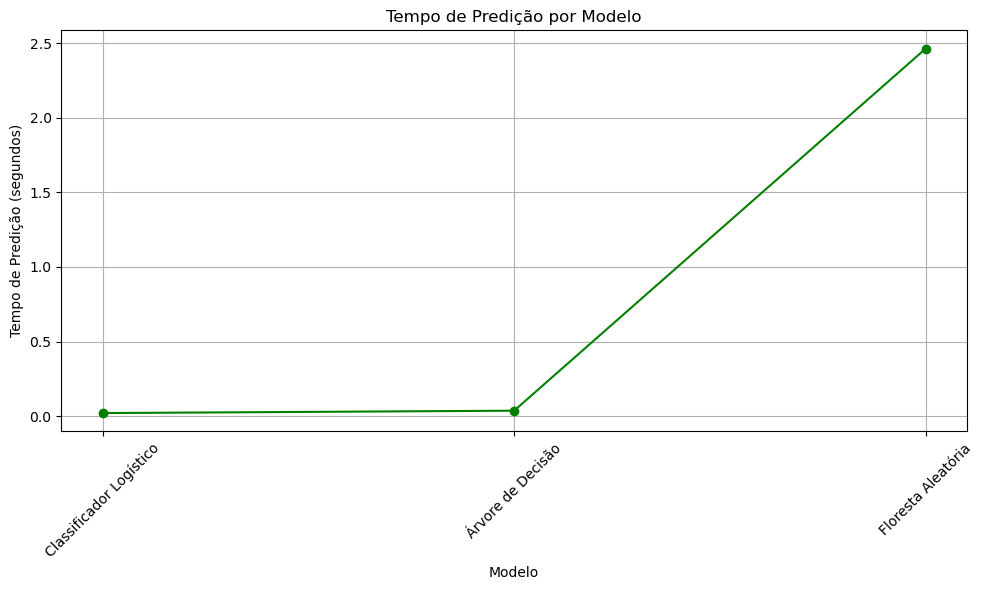

In [18]:
# Tempos de predição para cada modelo
tempos = [prediction_time, prediction_time1, prediction_time2]
modelos = ['Classificador Logístico', 'Árvore de Decisão', 'Floresta Aleatória']

# Criar o gráfico de linhas
plt.figure(figsize=(10, 6))
plt.plot(modelos, tempos, marker='o', color='green', linestyle='-')

# Adicionar título e rótulos aos eixos
plt.title('Tempo de Predição por Modelo')
plt.xlabel('Modelo')
plt.ylabel('Tempo de Predição (segundos)')

# Exibir o gráfico
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
# Avaliar os classificadores
print('')
print('Classificador logístico:')
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

print('')
print('Árvore de decisão:')
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))

print('')
print('Floresta aleatória:')
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))


Classificador logístico:
              precision    recall  f1-score   support

      BENIGN       0.73      0.17      0.28       531
   DrDoS_UDP       1.00      1.00      1.00    783670

    accuracy                           1.00    784201
   macro avg       0.86      0.59      0.64    784201
weighted avg       1.00      1.00      1.00    784201

[[    91    440]
 [    34 783636]]

Árvore de decisão:
              precision    recall  f1-score   support

      BENIGN       0.96      0.94      0.95       531
   DrDoS_UDP       1.00      1.00      1.00    783670

    accuracy                           1.00    784201
   macro avg       0.98      0.97      0.98    784201
weighted avg       1.00      1.00      1.00    784201

[[   500     31]
 [    21 783649]]

Floresta aleatória:
              precision    recall  f1-score   support

      BENIGN       1.00      0.96      0.98       531
   DrDoS_UDP       1.00      1.00      1.00    783670

    accuracy                           1.00  

In [20]:
# Avalia o desempenho do modelo Random forest

rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, pos_label='BENIGN', average='binary')
rf_recall = recall_score(y_test, y_pred_rf, pos_label='BENIGN', average='binary')
rf_f1 = f1_score(y_test, y_pred_rf, pos_label='BENIGN', average='binary')

print(f"Acurácia: {rf_accuracy:.4f}")
print(f"Precisão: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1-Score: {rf_f1:.4f}")

Acurácia: 1.0000
Precisão: 0.9961
Recall: 0.9642
F1-Score: 0.9799


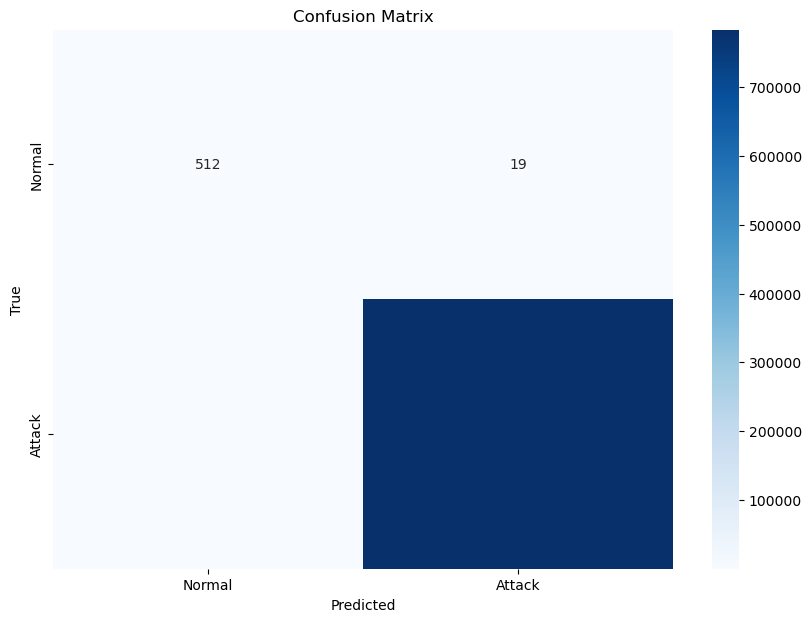

In [21]:
# Matriz de confusão
cm = confusion_matrix(y_test, y_pred_rf)

# Plot da matriz de confusão
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [22]:

# Métricas para o classificador logístico
report_lr = classification_report(y_test, y_pred_lr, output_dict=True)
precision_lr_dr = report_lr['DrDoS_UDP']['precision']
recall_lr_dr = report_lr['DrDoS_UDP']['recall']
f1_score_lr_dr = report_lr['DrDoS_UDP']['f1-score']
precision_lr_benign = report_lr['BENIGN']['precision']
recall_lr_benign = report_lr['BENIGN']['recall']
f1_score_lr_benign = report_lr['BENIGN']['f1-score']

# Métricas para a árvore de decisão
report_dt = classification_report(y_test, y_pred_dt, output_dict=True)
precision_dt_dr = report_dt['DrDoS_UDP']['precision']
recall_dt_dr = report_dt['DrDoS_UDP']['recall']
f1_score_dt_dr = report_dt['DrDoS_UDP']['f1-score']
precision_dt_benign = report_dt['BENIGN']['precision']
recall_dt_benign = report_dt['BENIGN']['recall']
f1_score_dt_benign = report_dt['BENIGN']['f1-score']

# Métricas para a floresta aleatória
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
precision_rf_dr = report_rf['DrDoS_UDP']['precision']
recall_rf_dr = report_rf['DrDoS_UDP']['recall']
f1_score_rf_dr = report_rf['DrDoS_UDP']['f1-score']
precision_rf_benign = report_rf['BENIGN']['precision']
recall_rf_benign = report_rf['BENIGN']['recall']
f1_score_rf_benign = report_rf['BENIGN']['f1-score']

classificadores = ['Logístico', 'Árvore de Decisão', 'Floresta Aleatória']
precisao_dr = [precision_lr_dr, precision_dt_dr, precision_rf_dr]
recall_dr = [recall_lr_dr, recall_dt_dr, recall_rf_dr]
f1_dr = [f1_score_lr_dr, f1_score_dt_dr, f1_score_rf_dr]
precisao_benign = [precision_lr_benign, precision_dt_benign, precision_rf_benign]
recall_benign = [recall_lr_benign, recall_dt_benign, recall_rf_benign]
f1_benign = [f1_score_lr_benign, f1_score_dt_benign, f1_score_rf_benign]

In [23]:
# Verifica se o diretório 'img' existe, caso contrário, cria-o
if not os.path.exists('img'):
    os.makedirs('img')

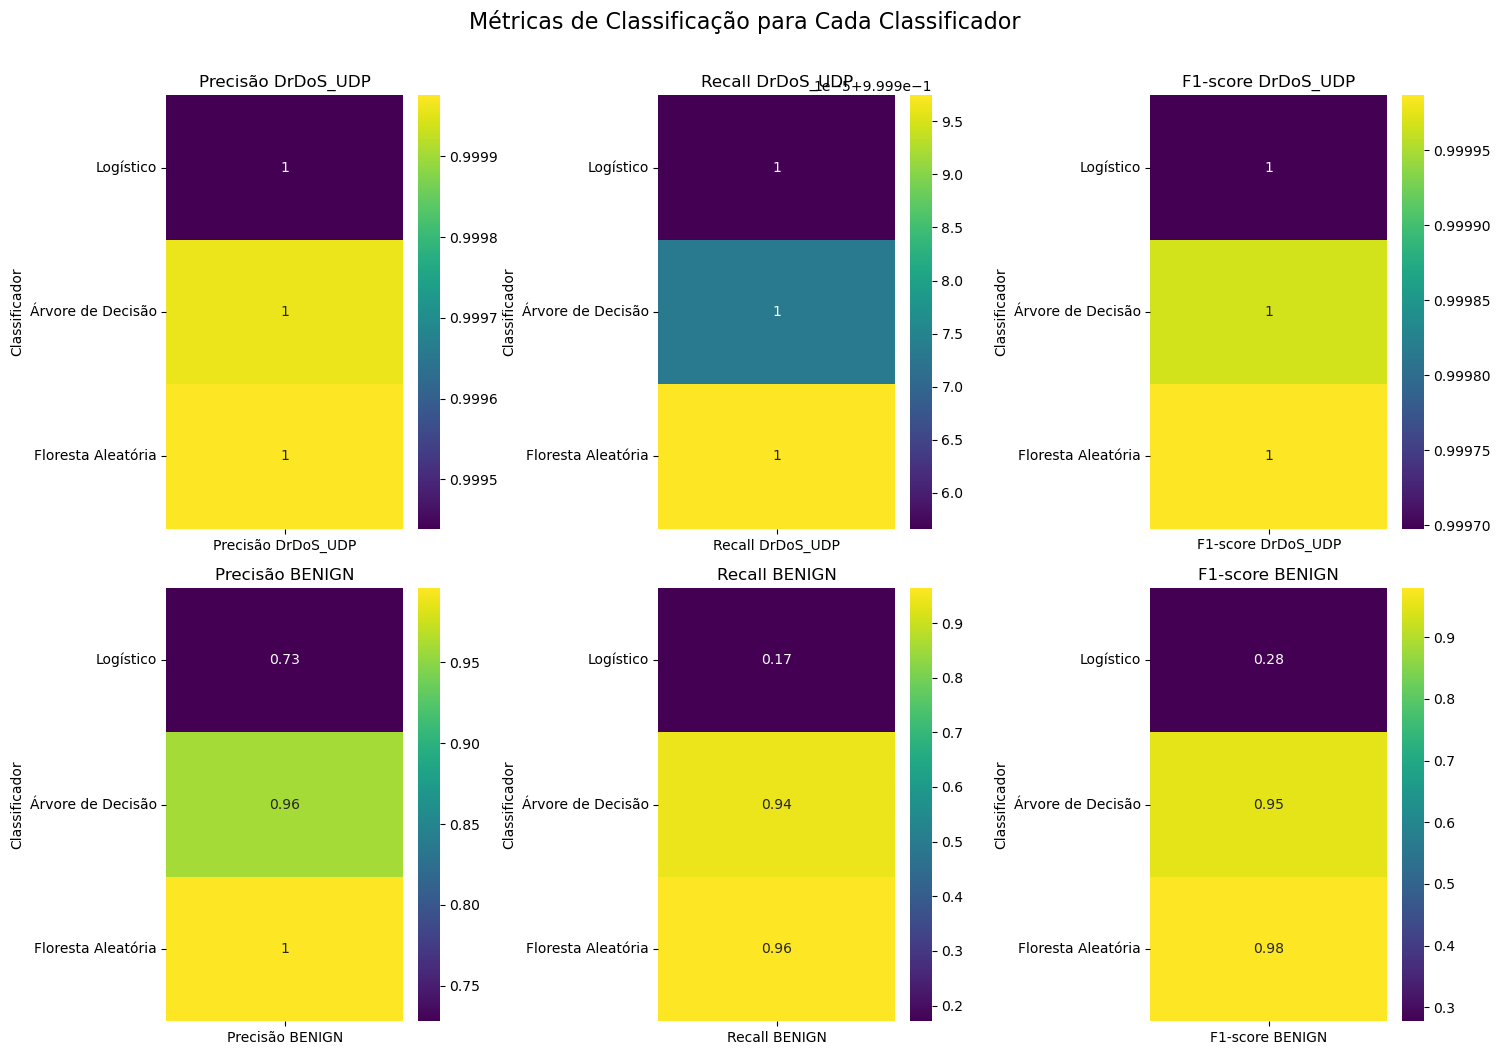

In [24]:
# Cria um dataframe para cada métrica
df_precisao_dr = pd.DataFrame({'Classificador': classificadores, 'Precisão DrDoS_UDP': precisao_dr})
df_recall_dr = pd.DataFrame({'Classificador': classificadores, 'Recall DrDoS_UDP': recall_dr})
df_f1_dr = pd.DataFrame({'Classificador': classificadores, 'F1-score DrDoS_UDP': f1_dr})

df_precisao_benign = pd.DataFrame({'Classificador': classificadores, 'Precisão BENIGN': precisao_benign})
df_recall_benign = pd.DataFrame({'Classificador': classificadores, 'Recall BENIGN': recall_benign})
df_f1_benign = pd.DataFrame({'Classificador': classificadores, 'F1-score BENIGN': f1_benign})

# Cria um mapa de calor para cada métrica
fig = plt.figure(figsize=(15, 10))

plt.subplot(231)
sns.heatmap(df_precisao_dr.set_index('Classificador'), annot=True, cmap='viridis')
plt.title('Precisão DrDoS_UDP')

plt.subplot(232)
sns.heatmap(df_recall_dr.set_index('Classificador'), annot=True, cmap='viridis')
plt.title('Recall DrDoS_UDP')

plt.subplot(233)
sns.heatmap(df_f1_dr.set_index('Classificador'), annot=True, cmap='viridis')
plt.title('F1-score DrDoS_UDP')

plt.subplot(234)
sns.heatmap(df_precisao_benign.set_index('Classificador'), annot=True, cmap='viridis')
plt.title('Precisão BENIGN')

plt.subplot(235)
sns.heatmap(df_recall_benign.set_index('Classificador'), annot=True, cmap='viridis')
plt.title('Recall BENIGN')

plt.subplot(236)
sns.heatmap(df_f1_benign.set_index('Classificador'), annot=True, cmap='viridis')
plt.title('F1-score BENIGN')

plt.tight_layout()

# Adiciona um título ao gráfico
fig.suptitle('Métricas de Classificação para Cada Classificador', fontsize=16, y=1.05)
plt.savefig('img/metricas_de_classificacao_para_classificador_comparaty_plot.png', dpi=300, bbox_inches='tight')  # Salvar o gráfico em alta resolução (dpi=300)
plt.show()

In [25]:
# Imprimir o número de árvores
print(rf.n_estimators)

# Imprimir a profundidade máxima de cada árvore
print(rf.max_depth)

# Imprimir os valores de `min_samples_split` e `min_samples_leaf`
print(rf.min_samples_split, rf.min_samples_leaf)

100
5
2 1


# Unica arvore

In [26]:
# Obtém o número de recursos no modelo de árvore de decisão
n_features_in = rf.estimators_[0].n_features_in_

# Usa o atributo 'classes_' para obter os rótulos das classes
class_names = rf.classes_

dot_data = export_graphviz(rf.estimators_[0], out_file='img/tree.dot', feature_names=df_dados.columns[:n_features_in], class_names=class_names, filled=True, rounded=True, special_characters=True)

# Abre o arquivo .dot e lê o conteúdo
with open('img/tree.dot', 'r') as f:
    dot_text = f.read()

# Substitui os termos em inglês por suas traduções em português
dot_text = re.sub("gini", "Índice Gini", dot_text)
dot_text = re.sub("samples", "Amostras", dot_text)
dot_text = re.sub("value", "Valor", dot_text)
dot_text = re.sub("class", "Classe", dot_text)

# Escreve o texto modificado de volta para o arquivo .dot
with open('img/tree.dot', 'w') as f:
    f.write(dot_text)

# Visualiza o gráfico
graph = graphviz.Source(dot_text)
graph.render('img/tree', format='pdf', view=True)

'img\\tree.pdf'

# Visualizando todas as arvores.

In [27]:
# Crie um diretório para armazenar os arquivos .dot
if not os.path.exists('trees'):
    os.makedirs('trees')

# Exporta cada árvore como um arquivo .dot
for i, estimator in enumerate(rf.estimators_):
    # Obtém o número de recursos no modelo de árvore de decisão
    n_features_in = estimator.n_features_in_

    # Usa o atributo 'classes_' para obter os rótulos das classes
    class_names = rf.classes_

    dot_data = export_graphviz(estimator, out_file=f'trees/tree_{i}.dot', 
                               feature_names=df_dados.columns[:n_features_in],
                               class_names=class_names,
                               filled=True, rounded=True, special_characters=True)

    # Abre o arquivo .dot e lê o conteúdo
    with open(f'trees/tree_{i}.dot', 'r') as f:
        dot_text = f.read()

    # Substitui os termos em inglês por suas traduções em português
    dot_text = re.sub("gini", "Índice Gini", dot_text)
    dot_text = re.sub("samples", "Amostras", dot_text)
    dot_text = re.sub("value", "Valor", dot_text)
    dot_text = re.sub("class", "Classe", dot_text)

    # Escreve o texto modificado de volta para o arquivo .dot
    with open(f'trees/tree_{i}.dot', 'w') as f:
        f.write(dot_text)

    # Visualiza o gráfico
    graph = graphviz.Source(dot_text)
    graph.render(f'trees/tree_{i}', format='pdf', view=False)

# Juntar todos os PDFs em um único arquivo
merger = PdfMerger()

# Adicionar cada PDF das árvores ao objeto de mesclagem
for i in range(len(rf.estimators_)):
    merger.append(f'trees/tree_{i}.pdf')

# Salvar o arquivo final com todas as árvores
with open('trees/all_trees.pdf', 'wb') as output:
    merger.write(output)
    
print("Arvores criadas.")

Arvores criadas.


In [28]:
# Calcula a taxa de acerto para cada algoritmo
lr_accuracy = accuracy_score(y_test, y_pred_lr)
dt_accuracy = accuracy_score(y_test, y_pred_dt)

print('')
print('Classificador logístico:')
print(lr_accuracy)

print('')
print('Árvore de decisão:')
print(dt_accuracy)

print('')
print('Floresta aleatória:')
print(rf_accuracy)


Classificador logístico:
0.9993955631273105

Árvore de decisão:
0.9999336904696627

Floresta aleatória:
0.99997322115121


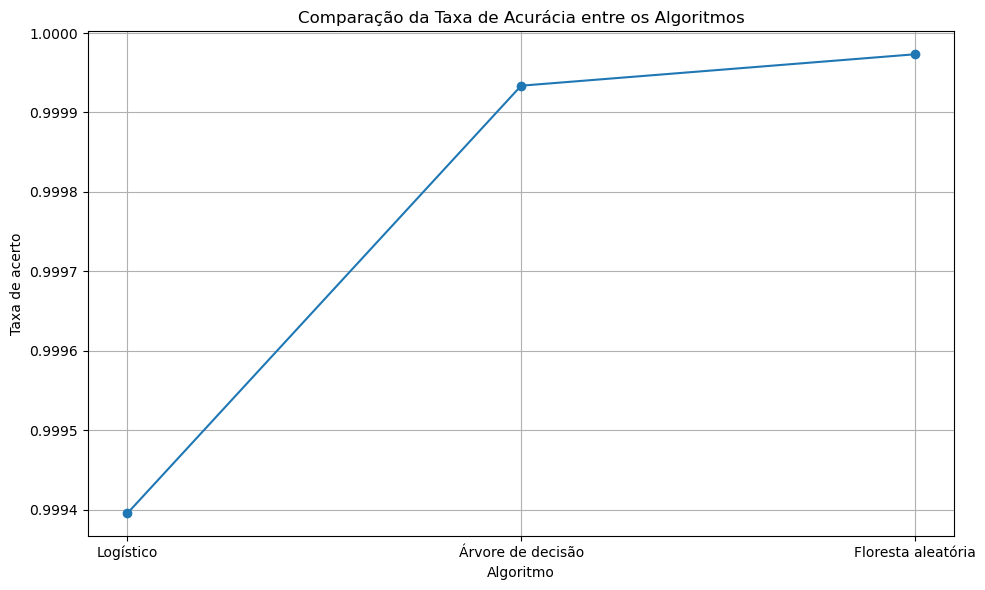

In [29]:
# Cria um gráfico de linhas
plt.figure(figsize=(10, 6))
plt.plot(["Logístico", "Árvore de decisão", "Floresta aleatória"], [lr_accuracy, dt_accuracy, rf_accuracy], marker='o', linestyle='-')

# Adiciona rótulos e título
plt.xlabel("Algoritmo")
plt.ylabel("Taxa de acerto")
plt.title("Comparação da Taxa de Acurácia entre os Algoritmos")

# Salva o gráfico em alta resolução (dpi=300) em uma pasta específica
plt.savefig('img/accuracy_comparison_plot.png', dpi=300, bbox_inches='tight')

# Exibe o gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

# Regressão linear

In [30]:
# Lista das colunas a serem selecionadas
colunas_selecionadas = ['Fwd Packet Length Mean', 'Fwd IAT Mean', 'min_seg_size_forward', 'Destination Port', 'Protocol', 'Label']

# Selecionar apenas as colunas desejadas
df_dados3 = dados_tr[colunas_selecionadas]

# Remover colunas duplicadas
df_dados3 = df_dados3.loc[:,~df_dados3.columns.duplicated()]
df_dados3 = df_dados3.dropna()

In [31]:
# Criar uma lista com todas as combinações possíveis de duas colunas, excluindo as repetidas
colunas = df_dados3.columns[:-1] # excluir a coluna Label
combinacoes = list(combinations(colunas, 2))

# Criar uma lista vazia para armazenar os resultados
resultados = []

# Criar um loop para iterar sobre as combinações
for x_col, y_col in combinacoes:
    # Separar as variáveis x e y do conjunto de dados
    x = df_dados3[x_col].values.reshape(-1, 1)
    y = df_dados3[y_col].values.reshape(-1, 1)

    # Criar e treinar um modelo de regressão linear
    model = LinearRegression()
    model.fit(x, y)

    # Fazer previsões com o modelo treinado
    y_pred = model.predict(x)

    # Calcular a acurácia do modelo
    r2 = r2_score(y, y_pred)

    # Armazenar o nome das colunas, o modelo, e a acurácia em uma lista
    resultados.append((x_col, y_col, model, r2))

In [32]:
# Criar uma função para encontrar a maior acurácia entre todos os modelos
def melhor_regressao(resultados):
    # Inicializar a maior acurácia com um valor baixo
    maior_r2 = -1
    # Inicializar as variáveis para armazenar o melhor resultado
    melhor_x = None
    melhor_y = None
    melhor_modelo = None
    # Criar um loop para iterar sobre os resultados
    for x_col, y_col, model, r2 in resultados:
        # Se a acurácia atual for maior que a maior acurácia
        if r2 > maior_r2:
            # Atualizar a maior acurácia com a acurácia atual
            maior_r2 = r2
            # Atualizar as variáveis com o melhor resultado
            melhor_x = x_col
            melhor_y = y_col
            melhor_modelo = model
    # Retornar o melhor resultado
    return melhor_x, melhor_y, melhor_modelo, maior_r2


In [33]:
# Mostrar o resultado da função
melhor_x, melhor_y, melhor_modelo, maior_r2 = melhor_regressao(resultados)

In [34]:
print("A melhor regressão linear é entre as colunas", melhor_x, "e", melhor_y)
print("O modelo é:", melhor_modelo)
print("A acurácia é:", maior_r2)

A melhor regressão linear é entre as colunas Fwd Packet Length Mean e Protocol
O modelo é: LinearRegression()
A acurácia é: 0.03515401946520602


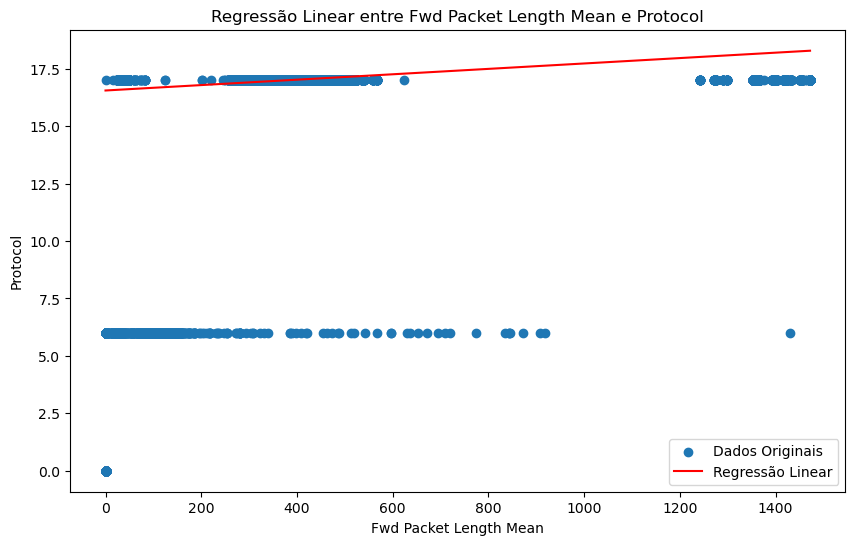

In [35]:
# Dados originais
x_col_data = df_dados3[melhor_x].values
y_col_data = df_dados3[melhor_y].values

# Linha de regressão
x = np.linspace(min(x_col_data), max(x_col_data), 100)
y_pred = melhor_modelo.predict(x.reshape(-1, 1))

plt.figure(figsize=(10, 6))
plt.scatter(x_col_data, y_col_data, label='Dados Originais')
plt.plot(x, y_pred, color='red', label='Regressão Linear')
plt.xlabel(melhor_x)
plt.ylabel(melhor_y)
plt.legend()
plt.title("Regressão Linear entre {} e {}".format(melhor_x, melhor_y))
plt.savefig("img/regressao_Linear_entre_colunas.png".format(melhor_x, melhor_y))
plt.show()

# Verificar Overffiting

In [36]:
# Dividir os dados em treino e teste
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.25, random_state=42)

In [37]:
# Definir diferentes números de nós terminais
num_nos_terminais = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40]

# Listas para armazenar os índices Gini de treinamento e teste
train_ginis = []
test_ginis = []

In [38]:
for num in num_nos_terminais:
    # Criar o modelo Random Forest com o número de árvores (nós terminais)
    rf_model = RandomForestClassifier(n_estimators=num, random_state=42)
    rf_model.fit(X_train3, y_train3)

    # Calcular índice Gini de treinamento
    train_gini = 1 - rf_model.score(X_train3, y_train3)
    train_ginis.append(train_gini)

    # Calcular índice Gini de teste
    test_gini = 1 - rf_model.score(X_test3, y_test3)
    test_ginis.append(test_gini)

C:\Users\Leo\AppData\Local\Temp\ipykernel_21800\1415427748.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train3, y_train3)
C:\Users\Leo\AppData\Local\Temp\ipykernel_21800\1415427748.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train3, y_train3)
C:\Users\Leo\AppData\Local\Temp\ipykernel_21800\1415427748.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train3, y_train3)
C:\Users\Leo\AppData\Local\Temp\ipykernel_21800\1415427748.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(

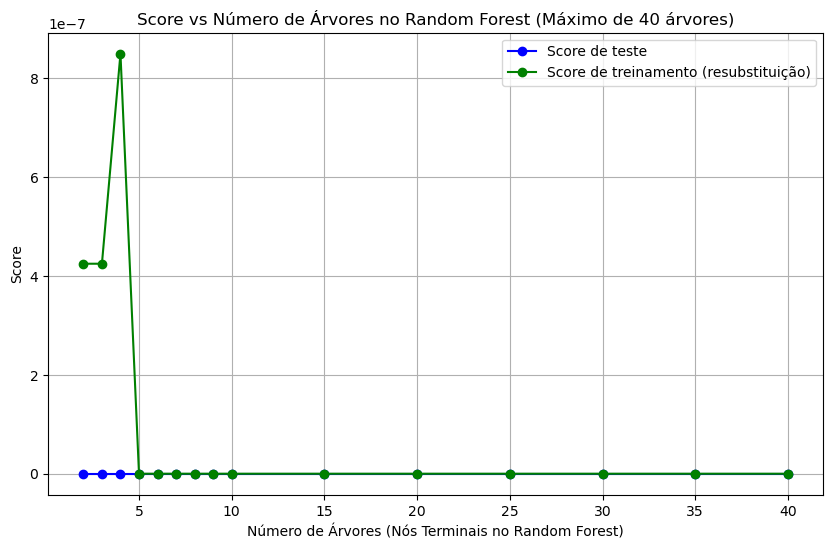

In [39]:
# Plotar os índices Gini de treinamento e teste versus o número de árvores
plt.figure(figsize=(10, 6))

# Linha representando o índice Gini de teste
plt.plot(num_nos_terminais, test_ginis, marker='o', color='blue', label='Score de teste')

# Linha representando o índice Gini de treinamento (resubstituição)
plt.plot(num_nos_terminais, train_ginis, marker='o', color='green', label='Score de treinamento (resubstituição)')

plt.xlabel('Número de Árvores (Nós Terminais no Random Forest)')
plt.ylabel('Score')
plt.title('Score vs Número de Árvores no Random Forest (Máximo de 40 árvores)')
plt.legend()
plt.grid(True)
# Salvar o gráfico como uma imagem (por exemplo, em formato PNG)
plt.savefig('img/grafico_indice_Score_num_nos.png')
plt.show()